# ADAptive LInear NEuron classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class AdalineGD():
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1+X. shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y-output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum()/2
            self.cost_.append(cost)
            print(self.w_)
        return self

    def net_input(self, X):
        return np. dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
#         return np.where(self.net_input(X) > self.thresholds, 1, -1)
        return np.where(self.activation(X) > 0.0, 1, -1)

### `__init__()`
**Parameters**

- `eta` : float
    - Learning rate (between 0.0 and 1.0)
- `n_iter` : int
    - Passes over the training dataset

**Attributes**
- `w_` : 1d-array
    - Weights after fitting
- `errors_` : list
    - Number of missclassifications in every epoch
    
### `fit()`
**Parameter**
- `X`:
    - {array-like}, `shape = [n_samples, n_features]` Training vectors, where n_samples is the number of samples and n_features is the number of features
- `y`:
    - array-like, `shape = [n_samples]` Target values
    
**Returns**
- `self` : object

### `net_input()`
- Calculate net input

### `activation()`
- Compute linear activation

### `predict()`
- Return class label after unit step

In [3]:
df = pd.read_csv('../input/iris.data', header=None)

In [4]:
y = df.iloc[0:100, 4].values
y = np.where(y=='Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

In [5]:
adal = AdalineGD(eta=0.01, n_iter=10).fit(X, y)
# ax[0].plot(range(1, len(adal.cost_) + 1), np.log10(adal.cost_), marker='o')

[0.    0.465 1.398]
[ -6.545091  -36.1128963 -19.1878272]
[ 252.4892171  1410.59533177  790.4242396 ]
[ -9979.56123384 -55734.44914837 -31188.85693652]
[ 394185.67984303 2201491.42665656 1231990.78283011]
[-15570317.21569782 -86958795.08860904 -48663529.13845022]
[6.15026588e+08 3.43486717e+09 1.92220651e+09]
[-2.42935133e+10 -1.35677047e+11 -7.59270417e+10]
[9.59592317e+11 5.35923520e+12 2.99911359e+12]
[-3.79038389e+13 -2.11689469e+14 -1.18464807e+14]


In [6]:
adal2 = AdalineGD(eta=0.0001, n_iter=10).fit(X, y)

[0.      0.00465 0.01398]
[-0.00065451  0.00559571  0.02576162]
[-0.0016914   0.00435746  0.03619703]
[-0.00294884  0.00183962  0.04579372]
[-0.00433062 -0.00141991  0.05485403]
[-0.00577955 -0.00510132  0.06355829]
[-0.0072617  -0.00901453  0.07201418]
[-0.00875694 -0.01304663  0.08028619]
[-0.01025338 -0.01713069  0.08841309]
[-0.01174401 -0.02122706  0.09641832]


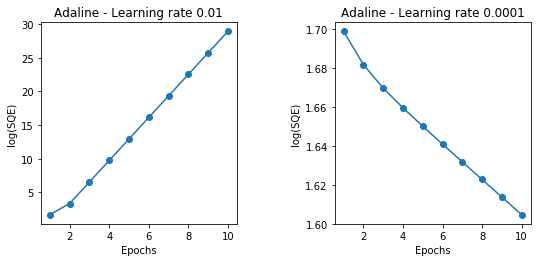

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ax[0].plot(range(1, len(adal.cost_) + 1), np.log10(adal.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(SQE)')
ax[0].set_title('Adaline - Learning rate 0.01')

ax[1].plot(range(1, len(adal2.cost_) + 1), np.log10(adal2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(SQE)')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.9, wspace=0.5, hspace=0.5)
plt.show()